# 🏙️ Flat Price Estimation for UrbanNest Realtors

## 🧾 Problem Statement
UrbanNest Realtors wants a machine learning model to predict flat prices based on:
- Area in sqft
- Number of bedrooms
- Distance to metro
- Age of flat
- Amenities score

This model helps provide accurate and quick pricing suggestions.


In [28]:
!pip install pandas numpy matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")


In [30]:
# Make sure the CSV file is in the same folder or provide full path
df = pd.read_csv("Flat Price Estimation for UrbanNest Realtors.csv")
df.head()


,area_sqft,bedrooms,distance_to_metro_km,age_of_flat_years,amenities_score,flat_price
0,693.0,4,2.49,17,7.0,2077761.0
1,755.0,3,2.04,11,1.3,2185745.0
2,1646.0,4,1.46,22,1.0,4343281.0
3,1036.0,4,0.10,6,7.7,3037490.0
4,1064.0,2,1.50,24,6.3,3019102.0


In [31]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_sqft             1000 non-null   float64
 1   bedrooms              1000 non-null   int64  
 2   distance_to_metro_km  1000 non-null   float64
 3   age_of_flat_years     1000 non-null   int64  
 4   amenities_score       1000 non-null   float64
 5   flat_price            1000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 47.0 KB


area_sqft               0
bedrooms                0
distance_to_metro_km    0
age_of_flat_years       0
amenities_score         0
flat_price              0
dtype: int64

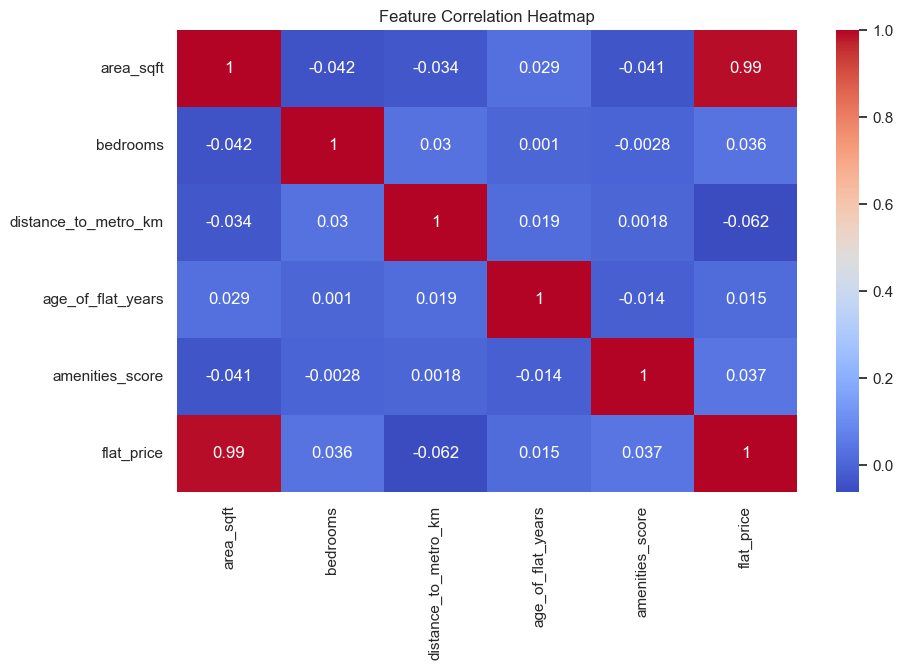

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



In [33]:
# Features (X) and Target (y)
X = df.drop("flat_price", axis=1)
y = df["flat_price"]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): ₹53,243.41
Root Mean Squared Error (RMSE): ₹65,317.04
R² Score: 0.9914


## ✅ Conclusion

The Random Forest model shows high accuracy (R² ≈ 0.99) and performs well in predicting flat prices using the dataset. UrbanNest Realtors can confidently use this system for automated pricing, enhancing trust and efficiency in client interactions.
